# Laboratorium 4 - Lasy losowe

### Importy

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt


### Wczytywanie danych

In [2]:
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
    'occupation', 'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 
    'hoursperweek', 'native-country', 'class'
]

categorical_columns = [
    'age','workclass', 'education', 'marital-status', 'occupation', 
    'relationship', 'race', 'sex', 'native-country'
]
numeric_columns = [col for col in columns if col not in categorical_columns and col != 'class']

data = pd.read_csv('dataset/adult-all.csv',header=None, delimiter=',', names=columns, na_values="?")

data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Opracowanie danych

In [3]:
imputer = SimpleImputer(strategy="most_frequent")
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

X = data.drop("class", axis=1)
y = data["class"]

scaler = StandardScaler()
for column in categorical_columns:
    X[column] = LabelEncoder().fit_transform(X[column])
for column in numeric_columns:
    X[column] = scaler.fit_transform(data[[column]])

y = LabelEncoder().fit_transform(y)
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country
0,22,6,-1.061979,9,1.136512,4,0,1,4,1,0.146932,-0.217127,-0.034087,38
1,33,5,-1.007104,9,1.136512,2,3,0,4,1,-0.144804,-0.217127,-2.213032,38
2,21,3,0.246034,11,-0.419335,0,5,1,4,1,-0.144804,-0.217127,-0.034087,38
3,36,3,0.426663,1,-1.197259,2,5,0,2,1,-0.144804,-0.217127,-0.034087,38
4,11,3,1.408530,9,1.136512,2,9,5,2,0,-0.144804,-0.217127,-0.034087,4


### Podział na zbiory treningowe i testowe

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Klasyfikatory

In [5]:
rf = RandomForestClassifier(random_state=42)
et = ExtraTreesClassifier(random_state=42)

In [6]:
param_grid = {
    'n_estimators': [100,300],
    'min_samples_split': [2,10],
    'min_samples_leaf': [1,10]
}

In [7]:
rf_grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'min_samples_leaf': [1, 10],
                         'min_samples_split': [2, 10],
                         'n_estimators': [100, 300]},
             scoring='accuracy')

In [8]:
rf_scores = cross_val_score(rf_grid_search.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')
rf_precision = cross_val_score(rf_grid_search.best_estimator_, X_train, y_train, cv=5, scoring='precision')
rf_recall = cross_val_score(rf_grid_search.best_estimator_, X_train, y_train, cv=5, scoring='recall')

In [9]:
et_grid_search = GridSearchCV(estimator=et, param_grid=param_grid, cv=5, scoring='accuracy')
et_grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=42),
             param_grid={'min_samples_leaf': [1, 10],
                         'min_samples_split': [2, 10],
                         'n_estimators': [100, 300]},
             scoring='accuracy')

In [10]:
et_scores = cross_val_score(et_grid_search.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')
et_precision = cross_val_score(et_grid_search.best_estimator_, X_train, y_train, cv=5, scoring='precision')
et_recall = cross_val_score(et_grid_search.best_estimator_, X_train, y_train, cv=5, scoring='recall')

In [23]:
print("Random Forest:")
print(f"Accuracy: {rf_scores.mean():.4f} (+/- {rf_scores.std():.4f})")
print(f"Precision: {rf_precision.mean():.4f} (+/- {rf_precision.std():.4f})")
print(f"Recall: {rf_recall.mean():.4f} (+/- {rf_recall.std():.4f})")
for param, value in rf_grid_search.best_params_.items():
    print(f"{param}: {value}")

Random Forest:
Accuracy: 0.8639 (+/- 0.0040)
Precision: 0.7649 (+/- 0.0097)
Recall: 0.6214 (+/- 0.0141)
min_samples_leaf: 1
min_samples_split: 10
n_estimators: 100


In [12]:
rf_results_df = pd.DataFrame(rf_grid_search.cv_results_)
rf_results_df


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.182480,0.042899,0.143047,0.002951,1,2,100,"{'min_samples_leaf': 1, 'min_samples_split': 2...",0.856686,0.858989,0.860397,0.850269,0.860123,0.857293,0.003748,8
1,9.619368,0.230875,0.422342,0.003176,1,2,300,"{'min_samples_leaf': 1, 'min_samples_split': 2...",0.856814,0.859373,0.858861,0.850397,0.861275,0.857344,0.003753,7
2,2.807548,0.031991,0.134447,0.008610,1,10,100,"{'min_samples_leaf': 1, 'min_samples_split': 1...",0.865131,0.866155,0.864235,0.856284,0.867929,0.863947,0.004024,1
3,8.423026,0.029639,0.388592,0.006538,1,10,300,"{'min_samples_leaf': 1, 'min_samples_split': 1...",0.865643,0.866923,0.866411,0.854108,0.865626,0.863742,0.004842,2
4,2.163216,0.028857,0.102938,0.001330,10,2,100,"{'min_samples_leaf': 10, 'min_samples_split': ...",0.866923,0.866411,0.863852,0.855260,0.863322,0.863153,0.004187,5
5,6.611524,0.098736,0.308685,0.002963,10,2,300,"{'min_samples_leaf': 10, 'min_samples_split': ...",0.865899,0.866795,0.864619,0.856284,0.863962,0.863512,0.003746,3
6,2.193680,0.022952,0.103593,0.001181,10,10,100,"{'min_samples_leaf': 10, 'min_samples_split': ...",0.866923,0.866411,0.863852,0.855260,0.863322,0.863153,0.004187,5
7,6.409850,0.086367,0.306311,0.002588,10,10,300,"{'min_samples_leaf': 10, 'min_samples_split': ...",0.865899,0.866795,0.864619,0.856284,0.863962,0.863512,0.003746,3


In [22]:
print("Extra trees:")
print(f"Accuracy: {et_scores.mean():.4f} (+/- {et_scores.std():.4f})")
print(f"Precision: {et_precision.mean():.4f} (+/- {et_precision.std():.4f})")
print(f"Recall: {et_recall.mean():.4f} (+/- {et_recall.std():.4f})")
for param, value in et_grid_search.best_params_.items():
    print(f"{param}: {value}")

Extra trees:
Accuracy: 0.8575 (+/- 0.0044)
Precision: 0.7498 (+/- 0.0123)
Recall: 0.6055 (+/- 0.0118)
min_samples_leaf: 1
min_samples_split: 10
n_estimators: 300


In [14]:
et_results_df = pd.DataFrame(et_grid_search.cv_results_)
et_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.976492,0.030711,0.252185,0.004074,1,2,100,"{'min_samples_leaf': 1, 'min_samples_split': 2...",0.840209,0.842256,0.847154,0.843878,0.840807,0.842861,0.002493,8
1,8.967005,0.253554,0.746848,0.008133,1,2,300,"{'min_samples_leaf': 1, 'min_samples_split': 2...",0.842358,0.844815,0.847359,0.842957,0.843571,0.844212,0.001771,7
2,2.219902,0.027555,0.223803,0.006266,1,10,100,"{'min_samples_leaf': 1, 'min_samples_split': 1...",0.858942,0.855768,0.857699,0.855037,0.857903,0.857070,0.001444,2
3,6.640497,0.030403,0.652511,0.004509,1,10,300,"{'min_samples_leaf': 1, 'min_samples_split': 1...",0.856587,0.855256,0.859951,0.855446,0.858210,0.857090,0.001775,1
4,1.355030,0.018856,0.129444,0.001334,10,2,100,"{'min_samples_leaf': 10, 'min_samples_split': ...",0.847170,0.850650,0.850635,0.847973,0.851147,0.849515,0.001618,5
5,4.004998,0.042591,0.384027,0.005024,10,2,300,"{'min_samples_leaf': 10, 'min_samples_split': ...",0.846658,0.851264,0.850737,0.847563,0.852477,0.849740,0.002238,3
6,1.332094,0.005401,0.129780,0.003047,10,10,100,"{'min_samples_leaf': 10, 'min_samples_split': ...",0.847170,0.850650,0.850635,0.847973,0.851147,0.849515,0.001618,5
7,4.068386,0.135529,0.387665,0.011457,10,10,300,"{'min_samples_leaf': 10, 'min_samples_split': ...",0.846658,0.851264,0.850737,0.847563,0.852477,0.849740,0.002238,3


In [15]:
rf_importances = rf_grid_search.best_estimator_.feature_importances_
indices = np.argsort(rf_importances)[::-1]
print("Random forest features (sorted):")
for i, idx in enumerate(indices):
    print(f"{i+1}. {X.columns[idx]}: {round(rf_importances[idx],2)}")

Random forest features (sorted):
1. capitalgain: 0.15
2. relationship: 0.14
3. age: 0.13
4. education-num: 0.11
5. fnlwgt: 0.11
6. marital-status: 0.08
7. hoursperweek: 0.07
8. occupation: 0.05
9. capitalloss: 0.04
10. education: 0.04
11. workclass: 0.03
12. native-country: 0.01
13. sex: 0.01
14. race: 0.01


In [16]:
et_importances = et_grid_search.best_estimator_.feature_importances_
et_indices = np.argsort(et_importances)[::-1]
print("Extra trees features (sorted):")
for i, idx in enumerate(et_indices):
    print(f"{i+1}. {X.columns[idx]}: {round(et_importances[idx],2)}")

Extra trees features (sorted):
1. relationship: 0.14
2. capitalgain: 0.13
3. education-num: 0.13
4. marital-status: 0.12
5. age: 0.1
6. hoursperweek: 0.07
7. occupation: 0.06
8. fnlwgt: 0.05
9. education: 0.05
10. sex: 0.05
11. capitalloss: 0.04
12. workclass: 0.04
13. native-country: 0.01
14. race: 0.01


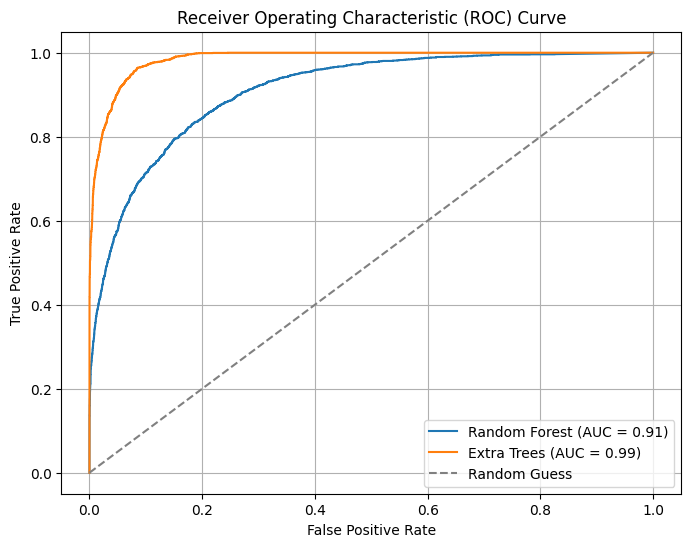

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, roc_auc_score

y_rf_scores = rf_grid_search.predict_proba(X_test)[:, 1]

y_et_scores = et_grid_search.predict_proba(X_test)[:, 1]

def plot_roc_curve(y_true, y_scores, label):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = roc_auc_score(y_true, y_scores)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(8, 6))
plot_roc_curve(y_test, y_rf_scores, label='Random Forest')
plot_roc_curve(y_test, y_et_scores, label='Extra Trees')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.savefig("graphs/roc")

